In [1]:
from utils import * 

%load_ext autoreload
%autoreload 2

In [21]:
metat_df = metat_load()
metat_df = metat_df[(metat_df.reactor == 'n')].copy()

print('Num. ECE genes detected in any sample:',( metat_df[metat_df.genome_id == 'linear_ece_19kb'].groupby('gene_id').detected.sum() > 0).sum())
mcr_gene_ids = ['mp_18.1_2150', 'mp_18.1_2147']

interproscan_df = load_interproscan().rename(columns={'id':'gene_id'})
interproscan_df = interproscan_df[interproscan_df.e_value < 1e-5].copy()

Num. ECE genes detected in any sample: 28


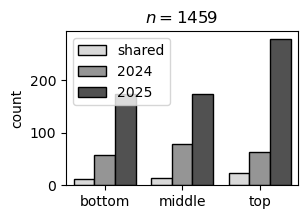

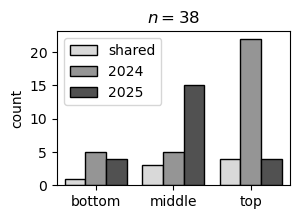

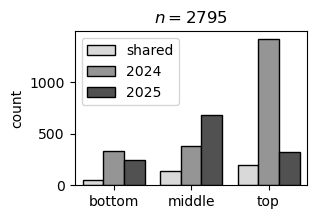

In [10]:
def plot_detected_genes(metat_df, genome_id:str='linear_ece_19kb'):

    fig, ax = plt.subplots(figsize=(3, 2)) 

    get_n_shared_genes = lambda df : len(np.intersect1d(df[(df.year == '2024') & (df.read_count > 0)].gene_id.unique(), df[(df.year == '2025') & (df.read_count > 0)].gene_id.unique()))

    metat_df = metat_df[(metat_df.reactor == 'n') & (metat_df.genome_id == genome_id)].copy()

    figure_df = list()
    for location, df in metat_df.groupby('location'):
        figure_df.append({'category':'shared', 'n':get_n_shared_genes(df), 'location':location})
        figure_df.append({'category':'2024', 'n':((df.year == '2024') & (df.read_count > 0)).sum(), 'location':location})
        figure_df.append({'category':'2025', 'n':((df.year == '2025') & (df.read_count > 0)).sum(), 'location':location})
    figure_df = pd.DataFrame(figure_df)
    n_total = metat_df.gene_id.nunique()

    sns.barplot(figure_df, y='n', x='location', hue='category', palette='Grays', ax=ax, edgecolor='black')
    ax.set_xlabel('')
    ax.set_ylabel('count')
    ax.get_legend().set_title('')
    ax.set_title(f'$n={n_total}$')
    plt.show()

plot_detected_genes(metat_df, genome_id='black_borg')
plot_detected_genes(metat_df, genome_id='linear_ece_19kb')
plot_detected_genes(metat_df, genome_id='mp_18')

In [4]:
annotations = dict()
annotations['linear_ece_19kb.1_'] = ''
annotations['linear_ece_19kb.1_2'] = 'unknown'
annotations['linear_ece_19kb.1_3'] = ''
annotations['linear_ece_19kb.1_4'] = ''
annotations['linear_ece_19kb.1_5'] = ''
annotations['linear_ece_19kb.1_'] = ''
annotations['linear_ece_19kb.1_'] = ''
annotations['linear_ece_19kb.1_'] = ''
annotations['linear_ece_19kb.1_'] = ''
annotations['linear_ece_19kb.1_'] = ''
annotations['linear_ece_19kb.1_'] = ''
annotations['linear_ece_19kb.1_'] = ''
annotations['linear_ece_19kb.1_'] = ''
annotations['linear_ece_19kb.1_'] = ''
annotations['linear_ece_19kb.1_'] = ''
annotations['linear_ece_19kb.1_'] = ''
annotations['linear_ece_19kb.1_17'] = 'single-stranded DNA binding protein, DUF669 '
annotations['linear_ece_19kb.1_22'] = 'unknown'
annotations['linear_ece_19kb.1_31'] = 'unknown'

# https://www.ebi.ac.uk/interpro/entry/InterPro/IPR014722/protein/UniProt/
# https://pmc.ncbi.nlm.nih.gov/articles/PMC3140696/ 
annotations['linear_ece_19kb.1_37'] = 'likely RNA-binding, maybe rRNA'
annotations['linear_ece_19kb.1_'] = ''

plot_read_counts: Dropping 28 genes with no presence in any sample.


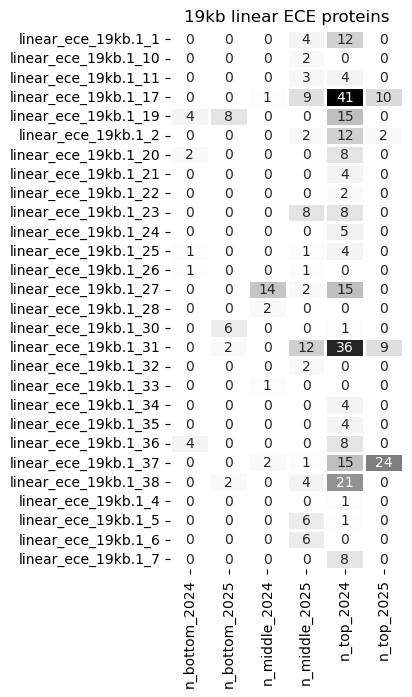

In [5]:
# If we are looking for genes whose transcription is regulated differently than the background transcription of the putative host, it
# seems reasonable to normalize with respect to putative host mcrAB. 

linear_ece_19kb_metat_df = metat_df[metat_df.genome_id == 'linear_ece_19kb'].copy()
linear_ece_19kb_metat_df['annotation'] = linear_ece_19kb_metat_df.gene_id.copy()
plot_read_counts(linear_ece_19kb_metat_df, title='19kb linear ECE proteins', drop_empty=True, figsize=(3, 7))

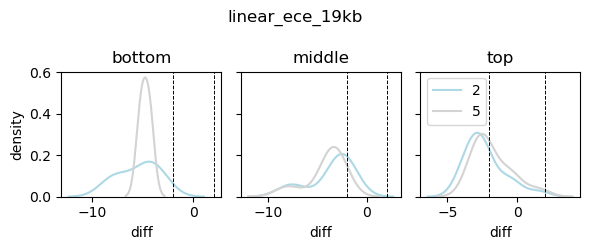

In [6]:
palette = {2:'lightblue', 5:'lightgray'}
locations = ['bottom', 'middle', 'top']
fig, axes = plt.subplots(figsize=(2 * len(locations), 2.5), ncols=len(locations), sharey=True)

for threshold, color in palette.items():
    plot_diff_distributions(metat_df, threshold=threshold, axes=axes, color=color, ref_gene_ids=mcr_gene_ids, genome_id='linear_ece_19kb')

axes[-1].legend()
for ax in axes:
    ax.axvline(2, ls='--', color='black', lw=0.7)
    ax.axvline(-2, ls='--', color='black', lw=0.7)

fig.suptitle('linear_ece_19kb')
fig.tight_layout()
plt.show()

In [17]:
linear_ece_19kb_diff_df = metat_get_diff(metat_df, location='top', genome_id='linear_ece_19kb', normalization='alr', ref_gene_ids=mcr_gene_ids, threshold=2)
black_borg_diff_df = metat_get_diff(metat_df, location='top', genome_id='black_borg', normalization='clr', ref_gene_ids=mcr_gene_ids, threshold=1)

In [ ]:
# Instead of looking 

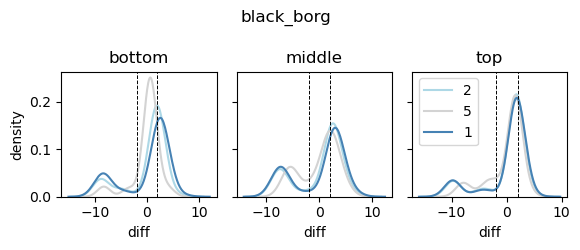

In [16]:
palette = {2:'lightblue', 5:'lightgray', 1:'steelblue'}
locations = ['bottom', 'middle', 'top']
fig, axes = plt.subplots(figsize=(2 * len(locations), 2.5), ncols=len(locations), sharey=True)

for threshold, color in palette.items():
    plot_diff_distributions(metat_df, threshold=threshold, axes=axes, color=color, normalization='clr',genome_id='black_borg')
    # plot_diff_distributions(metat_df, threshold=threshold, axes=axes, color=color, normalization='clr', genome_id='black_borg')

axes[-1].legend()
for ax in axes:
    ax.axvline(2, ls='--', color='black', lw=0.7)
    ax.axvline(-2, ls='--', color='black', lw=0.7)

fig.suptitle('black_borg')
fig.tight_layout()
plt.show()

In [24]:
black_borg_diff_df = black_borg_diff_df[black_borg_diff_df['diff'] > 1].copy()
black_borg_diff_df = black_borg_diff_df.merge(interproscan_df.drop(columns=['genome_id']), on='gene_id', how='left')
print('Num. genes meeting threshold:', black_borg_diff_df.gene_id.nunique())
print('Num. with no annotation:', black_borg_diff_df[black_borg_diff_df.signature_accession.isnull()].gene_id.nunique())
print('Num. with an InterPro description:', black_borg_diff_df[(black_borg_diff_df.interpro_description != '-') & (~black_borg_diff_df.interpro_accession.isnull())].gene_id.nunique(), end='\n\n')

# for hmm, df in diff_df.groupby('signature_analysis', observed=True):
#     print(f'Num. with a {hmm} annotation:', df.gene_id.nunique())
black_borg_diff_df = black_borg_diff_df[['gene_id', 'location', 'diff', 'interpro_accession', 'interpro_description']].copy()
black_borg_diff_df = black_borg_diff_df.rename(columns={'interpro_accession':'accession', 'interpro_description':'annotation'})
black_borg_diff_df = black_borg_diff_df.drop_duplicates(['gene_id', 'accession'])
black_borg_diff_df = black_borg_diff_df[(black_borg_diff_df.accession != '-') & (~black_borg_diff_df.accession.isnull())].copy()

Num. genes meeting threshold: 221
Num. with no annotation: 104
Num. with an InterPro description: 113



In [26]:
black_borg_diff_df[black_borg_diff_df.annotation.str.contains('capsid|coat|vir', case=False)]

,gene_id,location,diff,accession,annotation
1650,black_borg.2_128,top,2.852472,IPR011050,Pectin lyase fold/virulence factor


In [35]:
# interproscan_df[interproscan_df.signature_description.str.contains('capsid|coat|phage|DNA polymerase|histone', case=False) & (interproscan_df.genome_id == 'black_borg')]
interproscan_df[interproscan_df.signature_description.str.contains('histone|packaging', case=False) & (interproscan_df.genome_id == 'black_borg')]

,gene_id,md5,length,signature_analysis,signature_accession,signature_description,start,stop,e_value,status,date,interpro_accession,interpro_description,genome_id
2446,black_borg.1_104,baf07dc78604582470669976b82621fb,76,Gene3D,G3DSA:1.10.20.10,Histone-fold,9,73,6.900000e-21,T,02-01-2026,IPR009072,Histone-fold,black_borg
2444,black_borg.1_104,baf07dc78604582470669976b82621fb,76,Pfam,PF00808,Transcription factor CBF/NF-Y/archaeal histone...,9,70,1.900000e-13,T,02-01-2026,IPR003958,Transcription factor CBF/NF-Y/archaeal histone...,black_borg
2445,black_borg.1_104,baf07dc78604582470669976b82621fb,76,SUPERFAMILY,SSF47113,Histone-fold,7,73,1.410000e-17,T,02-01-2026,IPR009072,Histone-fold,black_borg
2447,black_borg.1_104,baf07dc78604582470669976b82621fb,76,PANTHER,PTHR47828,Archaeal histone HMF,8,73,1.000000e-24,T,02-01-2026,IPR050947,Archaeal histone HMF,black_borg


In [ ]:
#  subfam2354 subfam1011